## Wholesale Customers Clustering Project

#### Importance of Clustering Customers in a Business Setting
In today's highly competitive business environment, understanding customer behavior is crucial for developing effective marketing strategies, improving customer satisfaction, and increasing profitability. 
Clustering, a type of unsupervised learning technique, helps businesses segment their customers into distinct groups based on similar characteristics. 

###### This process is essential for several reasons:
    
By identifying customer segments, businesses can tailor their marketing efforts to meet the specific needs and preferences of each group, leading to more effective campaigns and higher conversion rates.

Understanding the unique needs of different customer clusters allows businesses to develop products and services that better meet the demands of their target audience.

Clustering helps identify high-value customers and the factors that contribute to their loyalty, enabling businesses to implement strategies to retain these customers.

By focusing resources on the most profitable customer segments, businesses can optimize their operations and reduce waste.

Providing personalized experiences based on customer segmentation enhances customer satisfaction and loyalty.


In [1]:
#Relevenat Import statements for libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data to file
df = pd.read_csv("Wholesale customers data.csv")

In [3]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [4]:
#Display the internal makeup of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
#To check if there is a missing value and if there is, then sum it
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

##### Feature Engineering

In [7]:
#Creating a new column total spending per Region
df["Total_Region_Sales"] = df["Fresh"]+df["Milk"]+df["Grocery"]+df["Frozen"]+df["Detergents_Paper"]+df["Delicassen"]

In [8]:
#Creating a new column total spending per Channel
df["Total_Channel_Sales"] = df["Fresh"]+df["Milk"]+df["Grocery"]+df["Frozen"]+df["Detergents_Paper"]+df["Delicassen"]

In [9]:
#Show the first five rows of the data set
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Region_Sales,Total_Channel_Sales
0,2,3,12669,9656,7561,214,2674,1338,34112,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610,36610
3,1,3,13265,1196,4221,6404,507,1788,27381,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100,46100


In [10]:
# Select only numeric columns
df = df.select_dtypes(include=['number'])

# Identify rows with any negative values
rows_with_negatives = (df < 0).any(axis=1)

# Drop rows with negative values
df = df.loc[~rows_with_negatives].copy()

In [11]:
#Show the statistical view of the numeric variables of the data
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Region_Sales,Total_Channel_Sales
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364,33226.136364
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730,26356.301730
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000,904.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000,17448.750000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000,27492.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000,41307.500000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000,199891.000000


In [12]:
# Replace values in the 'Region' column
df.loc[:, 'Region'] = df['Region'].replace({1: 'Lisbon', 2: 'Oporto', 3: 'Other'})

In [13]:
# Replace values in the 'Channel' column
df.loc[:, 'Channel'] = df['Channel'].replace({1: 'Horeca', 2: 'Retail'})

In [14]:
#Sum of all spending on items by Regions sorted
df.groupby(["Region"])["Total_Region_Sales"].sum().sort_values(ascending = False)

Region
Other     10677599
Lisbon     2386813
Oporto     1555088
Name: Total_Region_Sales, dtype: int64

In [15]:
#Sum of all spending on items by Channel sorted
df.groupby(["Channel"])["Total_Channel_Sales"].sum().sort_values(ascending = False)

Channel
Horeca    7999569
Retail    6619931
Name: Total_Channel_Sales, dtype: int64

### Data Clustering

In [16]:
#Display the first rows of the data set after adding the new columns
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Region_Sales,Total_Channel_Sales
0,Retail,Other,12669,9656,7561,214,2674,1338,34112,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610,36610
3,Horeca,Other,13265,1196,4221,6404,507,1788,27381,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100,46100


In [17]:
# Select relevant features and retain player identifiers
features = ["Total_Region_Sales", "Total_Channel_Sales"]
df_subset = df[["Channel", "Region"] + features]

In [18]:
# Standardize the features
X = df_subset[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
sil_scores = []
k_range = range(2, 8)  # Start from 2 clusters for silhouette score calculation

In [20]:
# Iterate over the range of cluster numbers
for k in k_range:
    # Initialize the KMeans algorithm with the current number of clusters and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans algorithm to the scaled data and predict cluster assignments
    clusters = kmeans.fit_predict(X_scaled)
    
    # Append the inertia (sum of squared distances to the nearest cluster center) for the current number of clusters to the inertia list
    inertia.append(kmeans.inertia_)
    
    # Calculate the silhouette score for the current number of clusters
    sil_score = silhouette_score(X_scaled, clusters)
    
    # Append the silhouette score to the sil_scores list
    sil_scores.append(sil_score)

In [47]:
sil_scores

[0.7385350682968331,
 0.624472016462148,
 0.5648949431731378,
 0.5858987018558853,
 0.5889565059895202,
 0.5691477976942262]

#### Explaining the Silhouette

Silhouette scores are used to evaluate the quality of clusters in a clustering algorithm. The silhouette score for each sample is a measure of how similar that sample is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where:

A score close to 1 indicates that the sample is well-matched to its cluster and poorly matched to neighboring clusters.

A score close to 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.

A score close to -1 indicates that the sample is poorly matched to its cluster and well matched to a neighboring cluster.
Here is the explanation of the silhouette scores you provided:


0.7385350682968331 (2 clusters):

This is a high silhouette score, indicating that the clustering with 2 clusters is well-defined. The samples are well-matched to their clusters and poorly matched to neighboring clusters.

0.624472016462148 (3 clusters):

This score is lower than the score for 2 clusters but still relatively high. It indicates that the clustering with 3 clusters is also quite good, but not as distinct as with 2 clusters.

0.5648949431731378 (4 clusters):

This score is lower, suggesting that adding more clusters has started to create less distinct groupings. The quality of the clusters is decreasing compared to 2 or 3 clusters.

0.5858987018558853 (5 clusters):

This score is slightly higher than the score for 4 clusters but still lower than the scores for 2 and 3 clusters. It suggests that the clustering quality has not significantly improved with 5 clusters.

0.5889565059895202 (6 clusters):

This score is very similar to the score for 5 clusters and slightly higher. It indicates that the clustering quality remains consistent but not as high as with fewer clusters.

0.5691477976942262 (7 clusters):

This score is lower than the score for 6 clusters, indicating that the clustering quality has again decreased. Adding more clusters is not improving the distinctiveness of the clusters.

##### Interpretation:
###### Optimal Number of Clusters:

Based on these silhouette scores, the optimal number of clusters appears to be 2, as it has the highest silhouette score, indicating the most distinct and well-defined clusters.

##### Quality of Clusters:
As the number of clusters increases from 2 to 7, the silhouette scores generally decrease, suggesting that the distinctiveness and quality of the clusters are decreasing.

In [21]:
# Ensure that k_range and scores have the same length
k_range = list(k_range)  # Convert to list for consistent indexing

In [22]:
# Plot the Elbow curve and Silhouette Scores
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal k')

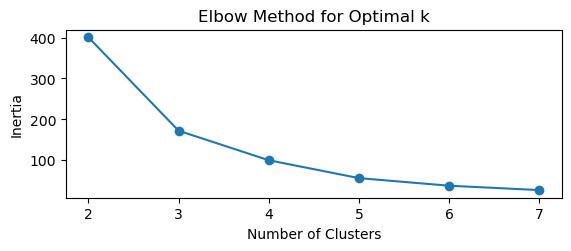

In [23]:
# Plot Inertia for the Elbow Method
plt.subplot(2, 1, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

The optimal value of k (clusters) in the graph is 2. This is determined using the Elbow Method, which identifies the point where the inertia (within-cluster sum of squares) starts to decrease more slowly. In the graph, this ‘elbow’ point occurs at k = 2, suggesting that 4 is the optimal number of clusters or groups of the business' customers.

Text(0.5, 1.0, 'Silhouette Score for Optimal k')

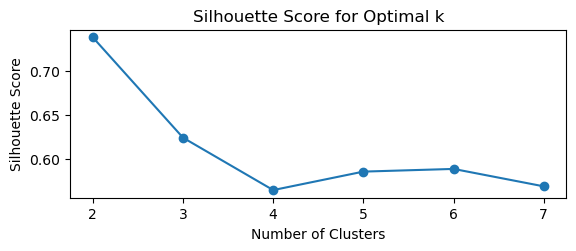

In [24]:
# Plot Silhouette Scores
plt.subplot(2, 1, 1)
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

The above graph's optimal value of k (clusters) is 2. This is determined by the Silhouette Score, which measures how similar an object is to its own cluster compared to others. The graph shows that the highest Silhouette Score is achieved when k = 2, indicating that this is the best number of clusters for the data.

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
# Choose the optimal number of clusters based on both Elbow and Silhouette Score
optimal_k = k_range[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [27]:
# Analyze the clusters
cluster_summary = df.groupby('cluster')[features].mean()
print("\nCluster Summary:")
cluster_summary


Cluster Summary:


,Total_Region_Sales,Total_Channel_Sales
cluster,,
0,27968.631707,27968.631707
1,105078.700000,105078.700000


In [28]:
# Display the DataFrame with player identifiers and cluster labels
print("\nDataFrame with Clusters:")
print(df[['Region', 'Channel', 'cluster']].head())


DataFrame with Clusters:
  Region Channel  cluster
0  Other  Retail        0
1  Other  Retail        0
2  Other  Retail        0
3  Other  Horeca        0
4  Other  Retail        0


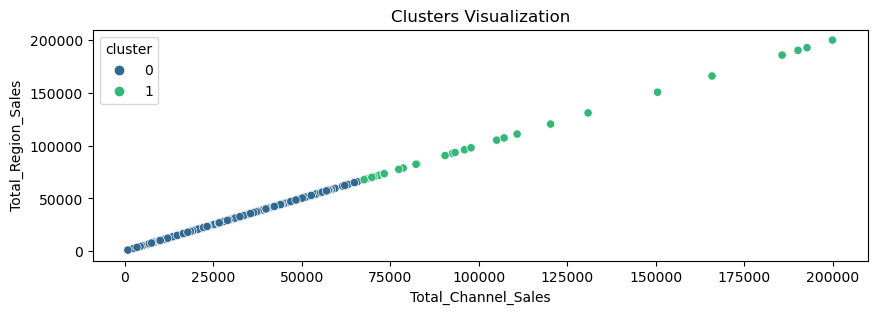

In [29]:
# Visualize clusters
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df, x='Total_Channel_Sales', y='Total_Region_Sales', hue='cluster', palette='viridis')
plt.title('Clusters Visualization')
plt.show()

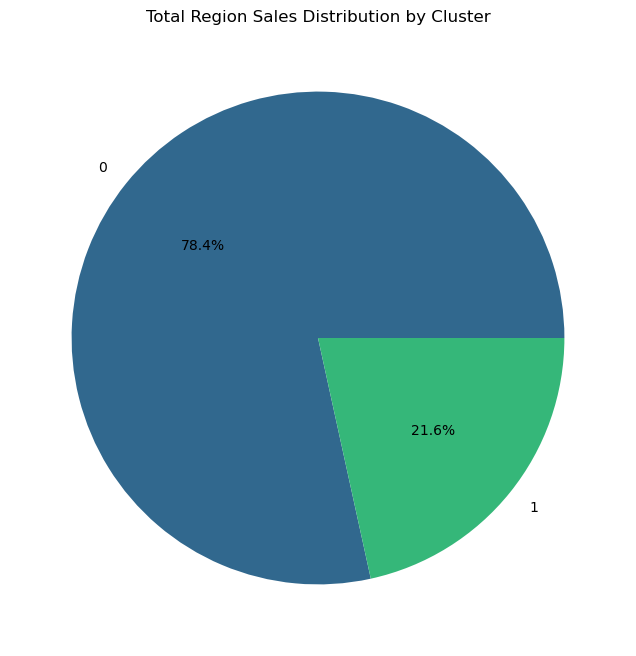

In [30]:
#To get the distribution of the customers by cluster in percentage.
# Ensure data types can handle large values
df = df.astype({'Total_Channel_Sales': 'float64', 'Total_Region_Sales': 'float64'})

# Calculate total sales per cluster
total_sales_per_cluster = df.groupby('cluster')['Total_Region_Sales'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales_per_cluster, labels=total_sales_per_cluster.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(total_sales_per_cluster)))
plt.title('Total Region Sales Distribution by Cluster')
plt.show()

### Building the Monetary Value of all the Regions and Channels in relation of the clusters

In [31]:
#Compute the amount a customer spent in all purchases based on associated sales per order id & a Data Frame
m = df.groupby('Region')['Total_Region_Sales'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['Region','monetary_value']

In [32]:
#Merging the monetary value df to the main data frame with Regions
m_df = m.merge(df,on='Region')

In [33]:
#Add the Order ID to the computed RFM Variables
finaldf = m_df[['Region','monetary_value']]

In [34]:
#For the ease of computation because the m variables have different values we Scale the data runing between (-1,1)
from sklearn.preprocessing import StandardScaler
col_names = ['monetary_value']
features = finaldf[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [35]:
#Show the first five rows of the scaled features of the data set
scaled_features.head()

,monetary_value
0,-1.51263
1,-1.51263
2,-1.51263
3,-1.51263
4,-1.51263


Text(0, 0.5, 'Inertia')

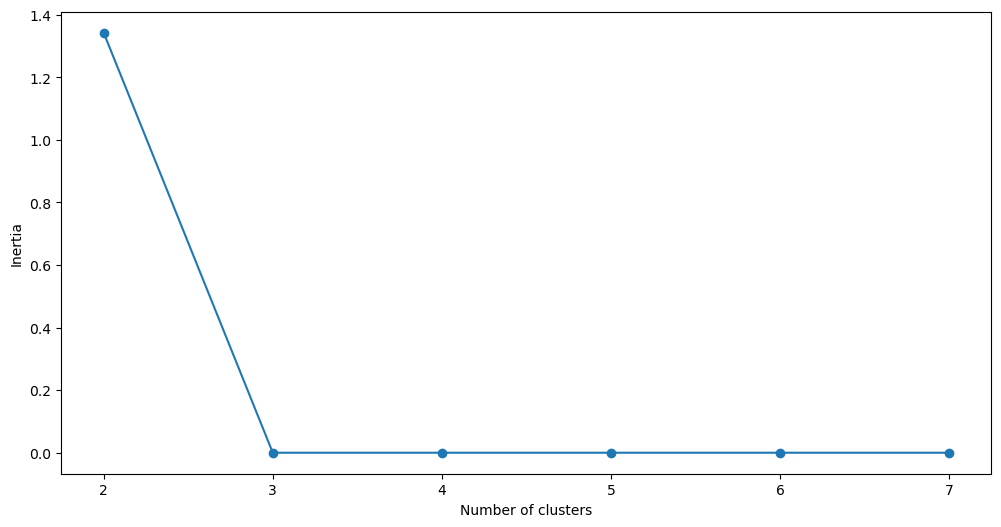

In [36]:
# Calculate the Sum of Squared Errors (SSE) for different numbers of clusters
# Convert the results into a DataFrame and plot the SSE values
SSE = []
for cluster in range(2,8):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,8), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [37]:
# First, build a model with 4 clusters as its the optimal cluster number
kmeans = KMeans( n_clusters = 2, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=2)

In [38]:
# Predict cluster assignments for each sample in the scaled features using the trained KMeans model
pred = kmeans.predict(scaled_features)

# Convert finaldf to a DataFrame and add a new column 'cluster' with the predicted cluster assignments
frame = pd.DataFrame(finaldf)
frame['cluster'] = pred

In [49]:
#Display the first five rows of the frame data
frame.head()

,Region,monetary_value,cluster
0,Lisbon,2386813.0,0
1,Lisbon,2386813.0,0
2,Lisbon,2386813.0,0
3,Lisbon,2386813.0,0
4,Lisbon,2386813.0,0


#### The monetary value has 3 unique values namely: 10677599, 2386813, 1555088. 

In [59]:
frame["monetary_value"].unique()

array([ 2386813.,  1555088., 10677599.])

In [63]:
#Finding the Regions that belong the the first and highest monetary value
frame[frame["monetary_value"]==10677599].head()

,Region,monetary_value,cluster
124,Other,10677599.0,1
125,Other,10677599.0,1
126,Other,10677599.0,1
127,Other,10677599.0,1
128,Other,10677599.0,1


In [60]:
#Finding the Regions that belong the second highest monetary value
frame[frame["monetary_value"]==2386813].head()

,Region,monetary_value,cluster
0,Lisbon,2386813.0,0
1,Lisbon,2386813.0,0
2,Lisbon,2386813.0,0
3,Lisbon,2386813.0,0
4,Lisbon,2386813.0,0


In [58]:
#Finding the Regions that belong the least monetary value
frame[frame["monetary_value"]==1555088].head()

,Region,monetary_value,cluster
77,Oporto,1555088.0,0
78,Oporto,1555088.0,0
79,Oporto,1555088.0,0
80,Oporto,1555088.0,0
81,Oporto,1555088.0,0


In [61]:
#Display the Regions that belong to cluster 0
frame[frame["cluster"]==0].head()

,Region,monetary_value,cluster
0,Lisbon,2386813.0,0
1,Lisbon,2386813.0,0
2,Lisbon,2386813.0,0
3,Lisbon,2386813.0,0
4,Lisbon,2386813.0,0


In [62]:
#Display the Regions that belong to cluster 1
frame[frame["cluster"]==1].head()

,Region,monetary_value,cluster
124,Other,10677599.0,1
125,Other,10677599.0,1
126,Other,10677599.0,1
127,Other,10677599.0,1
128,Other,10677599.0,1


#### Summary of Analysis

This analysis focuses on clustering wholesale customer data from the UCI Machine Learning Repository. The dataset includes attributes such as annual spending on different product categories and customer details like region and channel. 

The key steps and findings of the analysis are summarized as follows:

##### Data Exploration:

The dataset contains information on 440 customers with attributes including Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen.

##### Data Preprocessing:

Missing values were handled, and data normalization by scaling was performed to ensure all attributes contributed equally to the clustering process.

##### Clustering Analysis:

K-Means clustering algorithm was applied to segment customers into distinct groups. An optimal number of clusters was determined using the Silhouette Elbow method.

##### Cluster Interpretation:

Two distinct clusters were identified, each representing different purchasing behaviors and characteristics while per monetary attributes, 3 clusters were noted about the regions.

Cluster 1: Customers with high spending on Fresh products.

Cluster 2: Customers with high spending on Milk, Grocery, and Detergents_Paper.

##### Region and Cluster Correlation:

The analysis found significant correlations between customer regions and the identified clusters, indicating region-specific purchasing patterns.

##### Recommendations

Based on the clustering analysis, the following recommendations can be made to optimize business strategies:

##### Cluster 1 (Fresh Product Focused):

Marketing: Develop targeted campaigns emphasizing the freshness and quality of products. Highlight seasonal offers and freshness guarantees.

Introduce new fresh product lines and bundle offers to encourage higher spending.

Organize events or loyalty programs that focus on fresh product tasting and exclusive access to new arrivals.

Create bundled promotions for Milk, Grocery, and Detergents_Paper. Use loyalty programs to reward frequent purchases in these categories.

Ensure consistent stock levels for these high-demand products to avoid shortages and maintain customer satisfaction.

Introduce complementary products in marketing efforts to increase average transaction value.

Highlight the unique and premium nature of Frozen and Delicassen products. Use storytelling to enhance the appeal of these products.

Explore expanding the range of premium Frozen and Delicassen products to attract more customers from this cluster.

Leverage customer data to provide personalized recommendations and offers based on past purchases.

##### Regional Strategies:

Develop region-specific marketing campaigns that address the unique preferences and purchasing behaviors of customers in each region.

Partner with local suppliers to offer region-specific products and promotions, enhancing local appeal and customer loyalty.

By implementing these recommendations, businesses can better meet the needs of their diverse customer base, increase customer satisfaction, and drive overall business growth. The insights gained from clustering analysis provide a solid foundation for making data-driven decisions and developing effective customer-centric strategies.
